In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import keras

from tensorflow.keras import layers
from tensorflow.keras import losses

import matplotlib.pyplot as plt

from pymystem3 import Mystem

In [94]:
mystem = Mystem()

In [95]:
def lemmatize(input_data):
  a = mystem.lemmatize(input_data)
  return "".join(a)
    
def custom_standardization(input_data):
  s = tf.strings.lower(input_data)
  s = tf.strings.regex_replace(s, 'https?://\\S+', '')
#  s = tf.strings.regex_replace(s, r'@\S+', '')
  s = tf.strings.regex_replace(s, '[%s]' % re.escape(string.punctuation), '')
  return s

In [51]:
GRADE3 = {
    'Bad':0, 
    'Neutral':1, 
    'Good':2,
}

def classify(label):
    return GRADE3[label]

In [52]:
train_data = pd.read_json("/home/alex/Data/datasets/kinopoisk-sentiment-classification/train.jsonl", lines=True)
validation_data = pd.read_json("/home/alex/Data/datasets/kinopoisk-sentiment-classification/validation.jsonl", lines=True)
test_data = pd.read_json("/home/alex/Data/datasets/kinopoisk-sentiment-classification/test.jsonl", lines=True)


In [53]:
train_data

,id,text,label,label_text
0,0,"Если честно, меня не очень впечатлила новость,...",2,Good
1,1,"Сразу скажу — книгу я не читала, поэтому о том...",0,Bad
2,2,Общее впечатление таково: фильм не назовешь пл...,1,Neutral
3,3,Только что посмотрела этот «фильм». Рецензии п...,0,Bad
4,4,"Скажу сразу же, фильм — гениален! Если есть те...",2,Good
...,...,...,...,...
10495,10495,"Думаю, что фильм заслуживает просмотра.\nОт ка...",2,Good
10496,10496,"Тонны стирального порошка в виде наркотиков, н...",0,Bad
10497,10497,На этот фильм у меня даже и в планах не было и...,0,Bad
10498,10498,-Игра разумов\nНа самом деле фильм предназначе...,2,Good


In [54]:
train_raw_text_data = np.array(train_data['text'].map(lemmatize))
validation_raw_text_data = np.array(validation_data['text'].map(lemmatize))
test_raw_text_data = np.array(test_data['text'].map(lemmatize))

In [55]:
train_label_data = keras.utils.to_categorical(np.array(train_data['label']))
validation_label_data = keras.utils.to_categorical(np.array(validation_data['label']))
test_label_data = keras.utils.to_categorical(np.array(test_data['label']))

In [56]:
max_features = 20000
sequence_length = 600

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
#    standardize=custom_standardization,
    output_mode='int',
#    ngrams=2,
    output_sequence_length=sequence_length
)

In [98]:
base_vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    ngrams=2,
    output_sequence_length=sequence_length
)

In [57]:
train_raw_text_data

array(['если честно, я не очень впечатлить новость, о то, что гай ричи собираться снимать фильм, о шерлок холмс. подумать — да это же быть: карта, деньги, два ствол — у холмс и у ватсон. но затем по мера появление трейлер, и больший информация поменять свой отношение.\n«шерлок холмс» — последний картина, на который я планировать пойти в этот год. жутко бояться, что она я разочаровывать т. к. перед этот быть расстраивать «безумный спецназ», «так себе каникулы» и немного 2012. но холмс полностью оправдывать доверие.\nсюжет\nв лента динамичный, а главное интересный и захватывающий сюжет, что в последний время не так уж и часто. новый холмс не поход классический образ представлять в картина игорь масленников, но это не портить он образ. он больше подобный на тони старка из «железный человек» или грегори хаус из сериал «доктор хаус». как и они, он весьма харизматичный, слегка безумный, но гениальный в свой любимый дело.\nна первый взгляд сюжет портить сверхъестественный восстание из могила 

In [58]:
vectorize_layer.adapt(train_raw_text_data)

In [99]:
base_vectorize_layer.adapt(train_raw_text_data)

In [100]:
base_vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'и',
 'в',
 'не',
 'что',
 'фильм',
 'на',
 'я',
 '—',
 'быть',
 'он',
 'это',
 'но',
 'с',
 'этот',
 'как',
 'а',
 'то',
 'который',
 'весь',
 'все',
 'свой',
 'так',
 'такой',
 'они',
 'к',
 'из',
 'по',
 'же',
 'о',
 'человек',
 'за',
 'бы',
 'один',
 'очень',
 'она',
 'от',
 'для',
 'у',
 'мочь',
 'мы',
 'просто',
 'только',
 'тот',
 'самый',
 'хороший',
 'его',
 'даже',
 'еще',
 'герой',
 'этот фильм',
 'то что',
 'если',
 'актер',
 'себя',
 'можно',
 'смотреть',
 'жизнь',
 'время',
 'уже',
 'или',
 'сказать',
 'сюжет',
 'первый',
 'много',
 'вот',
 'до',
 'да',
 'нет',
 'когда',
 'кино',
 'главный',
 'картина',
 'становиться',
 'сам',
 'вы',
 'мой',
 'роль',
 'ни',
 'раз',
 'другой',
 'кто',
 'и не',
 'игра',
 'понимать',
 'снимать',
 'каждый',
 'посмотреть',
 'говорить',
 'просмотр',
 'история',
 'после',
 'ну',
 'режиссер',
 'год',
 'зритель',
 'чтобы',
 'в фильм',
 'я не',
 'хотя',
 'знать',
 'хорошо',
 'в этот',
 'вообще',
 'персонаж',
 'во',
 'конечно',
 'нич

In [60]:
train_text_data = vectorize_layer(train_raw_text_data)
validation_text_data = vectorize_layer(validation_raw_text_data)
test_text_data = vectorize_layer(test_raw_text_data)

In [101]:
train_text_data_base = base_vectorize_layer(train_raw_text_data)
validation_text_data_base = base_vectorize_layer(validation_raw_text_data)
test_text_data_base = base_vectorize_layer(test_raw_text_data)

In [61]:
train_text_data

<tf.Tensor: shape=(10500, 600), dtype=int64, numpy=
array([[  51,  347,    8, ...,    0,    0,    0],
       [ 237,   60,    9, ...,    0,    0,    0],
       [ 163,  200, 1685, ...,    0,    0,    0],
       ...,
       [   7,   15,    6, ...,    0,    0,    0],
       [  81, 1100,    7, ...,    0,    0,    0],
       [ 641, 1910,    3, ...,    0,    0,    0]])>

In [144]:
embedding_dim=64

model_base = tf.keras.Sequential([
  keras.Input(shape=(None,), dtype='int64'),
  layers.Embedding(
    max_features, 
    embedding_dim,
    embeddings_initializer="uniform",
  ),  
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
#  layers.Dense(64, activation='relu'),
  layers.Dense(3)
])



In [145]:
model_base.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, None, 64)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,195 (4.88 MB)

 Trainable params: 1,280,195 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model_base.compile(loss=losses.CategoricalCrossentropy(from_logits=True),
              optimizer='rmsprop',
              metrics=['accuracy', 'F1Score'])

In [149]:
base_train_ds=tf.data.Dataset.from_tensor_slices((train_text_data_base, train_label_data)).shuffle(10000).batch(64)
base_validation_ds=tf.data.Dataset.from_tensor_slices((validation_text_data_base, validation_label_data)).shuffle(10000).batch(64)

In [151]:
base_checkpoint_filepath = "models/checkpoint_kinopoisk_model_base.keras"
epochs = 10
history = model_base.fit(
    base_train_ds,
    validation_data=base_validation_ds,
    epochs=epochs,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath=base_checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
        )        
    ]
)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - F1Score: 0.5756 - accuracy: 0.5868 - loss: 0.8634 - val_F1Score: 0.4243 - val_accuracy: 0.4740 - val_loss: 1.0470
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - F1Score: 0.5717 - accuracy: 0.5791 - loss: 0.8608 - val_F1Score: 0.5446 - val_accuracy: 0.5600 - val_loss: 0.9027
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - F1Score: 0.5787 - accuracy: 0.5847 - loss: 0.8553 - val_F1Score: 0.5897 - val_accuracy: 0.6080 - val_loss: 0.8392
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - F1Score: 0.5840 - accuracy: 0.5918 - loss: 0.8555 - val_F1Score: 0.5106 - val_accuracy: 0.5413 - val_loss: 0.9632
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - F1Score: 0.5890 - accuracy: 0.5968 - loss: 0.8428 - val_F1Score: 0.5390 - val_accuracy: 0.5807 - val_loss: 0.8501
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - F1Score: 0.6005 - accuracy: 0.6090 - loss: 0.8255 - val_F1Score: 0.6055 - val_accuracy: 0.6013 - val

In [152]:
model_base_best=tf.keras.models.load_model(base_checkpoint_filepath)

In [153]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model_base_best
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

export_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (1, 600)               │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ ?                      │     1,280,195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,195 (4.88 MB)

 Trainable params: 1,280,195 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

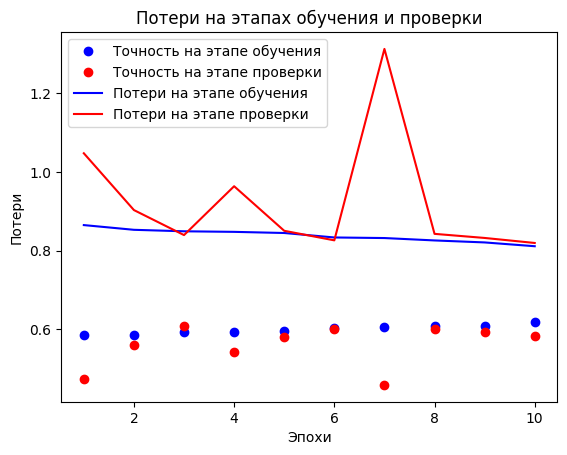

In [155]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy_values, "ro", label="Точность на этапе проверки")
plt.plot(epochs, loss_values, "b", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "r", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [62]:
ltsm_embedding_dim=32

model_lstm = tf.keras.Sequential([
    keras.Input(shape=(None,), dtype="int64"),
    tf.keras.layers.Embedding(
        input_dim=(max_features),
        output_dim=ltsm_embedding_dim,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_lstm.summary()

model_lstm.compile(loss=losses.CategoricalCrossentropy(from_logits=False),
              optimizer='rmsprop',
              metrics=['accuracy', 'F1Score'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 32)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,115 (2.66 MB)

 Trainable params: 698,115 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
train_ds=tf.data.Dataset.from_tensor_slices((train_text_data, train_label_data)).shuffle(10000).batch(64)
test_ds=tf.data.Dataset.from_tensor_slices((test_text_data, test_label_data)).shuffle(10000).batch(64)
validation_ds=tf.data.Dataset.from_tensor_slices((validation_text_data, validation_label_data)).shuffle(10000).batch(64)

In [64]:
checkpoint_filepath = "models/checkpoint_kinopoisk_model_lstm.keras"

epochs = 10
history = model_lstm.fit(
    x = train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
        )        
    ]
)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 82s 474ms/step - F1Score: 0.3522 - accuracy: 0.3892 - loss: 1.0732 - val_F1Score: 0.4209 - val_accuracy: 0.4933 - val_loss: 1.0217
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 116s 703ms/step - F1Score: 0.5610 - accuracy: 0.6058 - loss: 0.8283 - val_F1Score: 0.5398 - val_accuracy: 0.5660 - val_loss: 0.9061
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 141s 855ms/step - F1Score: 0.6299 - accuracy: 0.6540 - loss: 0.7402 - val_F1Score: 0.5333 - val_accuracy: 0.5407 - val_loss: 0.8829
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 148s 895ms/step - F1Score: 0.6914 - accuracy: 0.7055 - loss: 0.6641 - val_F1Score: 0.5748 - val_accuracy: 0.5927 - val_loss: 0.9076
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 150s 907ms/step - F1Score: 0.7417 - accuracy: 0.7498 - loss: 0.5781 - val_F1Score: 0.4722 - val_accuracy: 0.5013 - val_loss: 1.0507
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 146s 886ms/step - F1Score: 0.7999 - accuracy: 0.8026 - loss: 0.4910 - val_F1Score: 0.5225 - val_accur

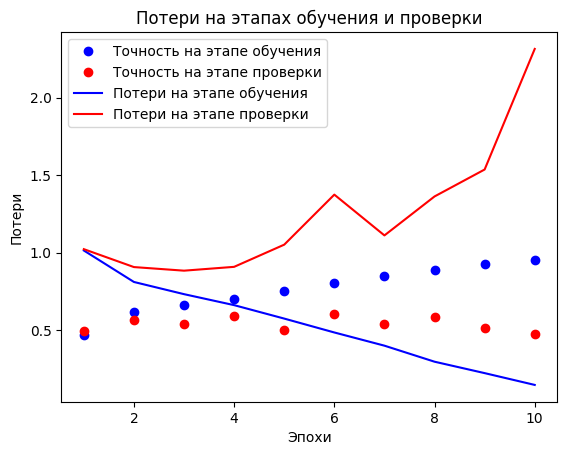

In [66]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy_values, "ro", label="Точность на этапе проверки")
plt.plot(epochs, loss_values, "b", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "r", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [75]:
model_lstm_best = tf.keras.models.load_model(checkpoint_filepath)

In [76]:
model_lstm_best.evaluate(validation_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - F1Score: 0.5336 - accuracy: 0.6039 - loss: 1.3349


[1.3735780715942383,
 0.6006666421890259,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.72321415, 0.1440823 , 0.700077  ], dtype=float32)>]

In [77]:
export_model_lstm = tf.keras.Sequential([
  vectorize_layer,
  model_lstm_best
])

export_model_lstm.compile(
    loss=losses.CategoricalCrossentropy(from_logits=False), optimizer="rmsprop", metrics=['accuracy', 'F1Score']
)

export_model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ ?                      │       698,115 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,115 (2.66 MB)

 Trainable params: 698,115 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model_lstm_2.evaluate(
    x = validation_text_data,
    y = validation_label_data,
)

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - F1Score: 0.5236 - accuracy: 0.6086 - loss: 1.3659


[1.3735783100128174,
 0.6006666421890259,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.72321415, 0.1440823 , 0.700077  ], dtype=float32)>]

In [36]:
test_text_data

<tf.Tensor: shape=(1500, 600), dtype=int64, numpy=
array([[ 194,    7, 1466, ...,    0,    0,    0],
       [ 948,   56,   15, ...,    0,    0,    0],
       [   4,  220, 3727, ...,    0,    0,    0],
       ...,
       [1317, 3769,   37, ...,    0,    0,    0],
       [2821,  104,    4, ...,    0,    0,    0],
       [ 633,  655,  734, ...,    0,    0,    0]])>

In [79]:
s = custom_standardization('''
Являюсь студентом первого курса факультета Э
За эти три месяца, что я здесь проучилась - почувствовала лишь разочарование. Ожидания от «лучшего технического» были явно лучше. Почему же так произошло? Разберём более детально 
''')

export_model_lstm.predict(tf.data.Dataset.from_tensor_slices([[[s]]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


array([[0.85559356, 0.14059892, 0.00380758]], dtype=float32)

In [116]:
np.sum(validation_label_data, 0)

array([0.12044521, 0.5130566 , 0.36649826], dtype=float32)

In [85]:
keras.models.save_model(export_model_lstm, 'models/export_kinopoisk_model_lstm.keras', overwrite=True)

In [86]:
export_model_lstm_2=keras.models.load_model('models/export_kinopoisk_model_lstm.keras')

In [48]:
export_model_lstm_2.predict(tf.data.Dataset.from_tensor_slices([[[s]]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


array([[9.6998078e-01, 2.9510092e-02, 5.0910184e-04]], dtype=float32)

In [89]:
export_model_lstm.evaluate(x=test_raw_text_data, y=test_label_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - F1Score: 0.5347 - accuracy: 0.6019 - loss: 0.0000e+00


[0.0,
 0.0,
 0.5973333120346069,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.72645736, 0.17304489, 0.6838006 ], dtype=float32)>,
 0.5973333120346069,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.72645736, 0.17304489, 0.6838006 ], dtype=float32)>]

Проверим полученную нейросеть на данных с tabiturient.ru

In [96]:
all_tabiturient_data = pd.read_json("/home/alex/Data/datasets/tabiturient/all-reviews.jsonl", lines=True)
raw_text_tabiturient_data = np.array(all_tabiturient_data['content'].map(lemmatize))
label_tabiturient_data = keras.utils.to_categorical(np.array(all_tabiturient_data['label']))

In [97]:
export_model_lstm.evaluate(x=raw_text_tabiturient_data, y=label_tabiturient_data)

114/114 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - F1Score: 0.4120 - accuracy: 0.5227 - loss: 0.0000e+00


[0.0,
 0.0,
 0.5505772233009338,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.68018866, 0.1320346 , 0.47348478], dtype=float32)>,
 0.5505772233009338,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.68018866, 0.1320346 , 0.47348478], dtype=float32)>]